<a href="https://colab.research.google.com/github/divypandya/OpenCV-with-Python-Course/blob/master/Comparing_Two_Images_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# P.S. you need to authorize your drive account if you want to upload or read 
# data from drive account

# P.S.2 you can just mount drive from file section :(



---

**Using Mean Squared Error**


---



In [0]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype('float') - imageB.astype('float'))**2)
    err /= float(imageA.shape[0]*imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
	# the two images are
    return err




---

**Using Structural Similarity Index**


---



In [0]:
# importing the necessary packages
from skimage import measure 
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [0]:
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
	# index for the images
    m = mse(imageA, imageB)
    ssim = measure.compare_ssim(imageA, imageB)
    
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle('MSE: %.2f, SSIM: %.2f' %(m,ssim))
    
    # show first image
    ax = fig.add_subplot(1,2,1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis('off')
    
    # showing second image
    ax = fig.add_subplot(1,2,2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis('off')
    
    # display the images
    plt.show()
    

In [0]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/jp_gates_original.png',1)
contrast = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/jp_gates_contrast.png',1)
photoshop = cv2.imread('drive/My Drive/Colab Notebooks/CV Tutorials/images/jp_gates_photoshopped.png',1)

# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
photoshop = cv2.cvtColor(photoshop, cv2.COLOR_BGR2GRAY)

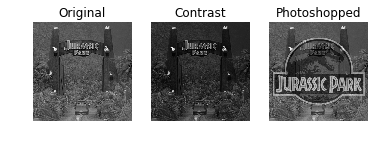

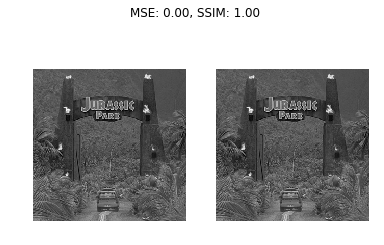

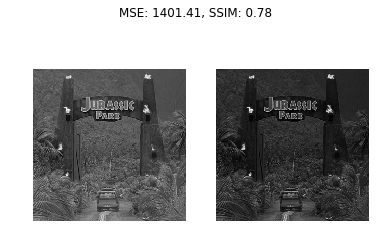

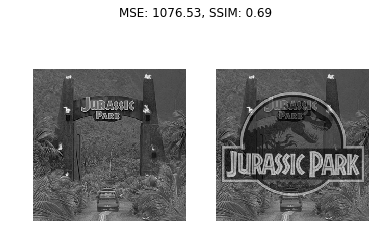

In [0]:
# initialize the figure
fig = plt.figure('Images')
images = ('Original',original), ('Contrast',contrast), ('Photoshopped',photoshop)

for (i,(name,image)) in enumerate(images):
    ax = fig.add_subplot(1,3,i+1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis('off')
    

# show the figure
plt.show()

# compare the images
compare_images(original, original, 'Original Vs Original')
compare_images(original, contrast, 'Original Vs Contrast')
compare_images(original, photoshop, 'Original Vs Photoshopped')